The Distance Correlation test is a statistical test that assesses the strength of the relationship between two random variables.
It is particularly useful for detecting non-linear relationships, unlike Pearson's correlation which only captures linear relationships.
The test is based on the concept of distance covariance, which measures the dependence between two random variables by comparing their pairwise distances.
The null hypothesis of the test is that the two variables are independent, while the alternative hypothesis is that they are dependent.
The test statistic is the distance correlation coefficient, which ranges from 0 (independence) to 1 (perfect dependence).
The p-value is computed by permuting the data and calculating the test statistic for each permutation.
A small p-value indicates that the null hypothesis can be rejected, suggesting a significant relationship between the variables.

![alt text](<attachment:Screenshot 2025-04-09 104523.png>)
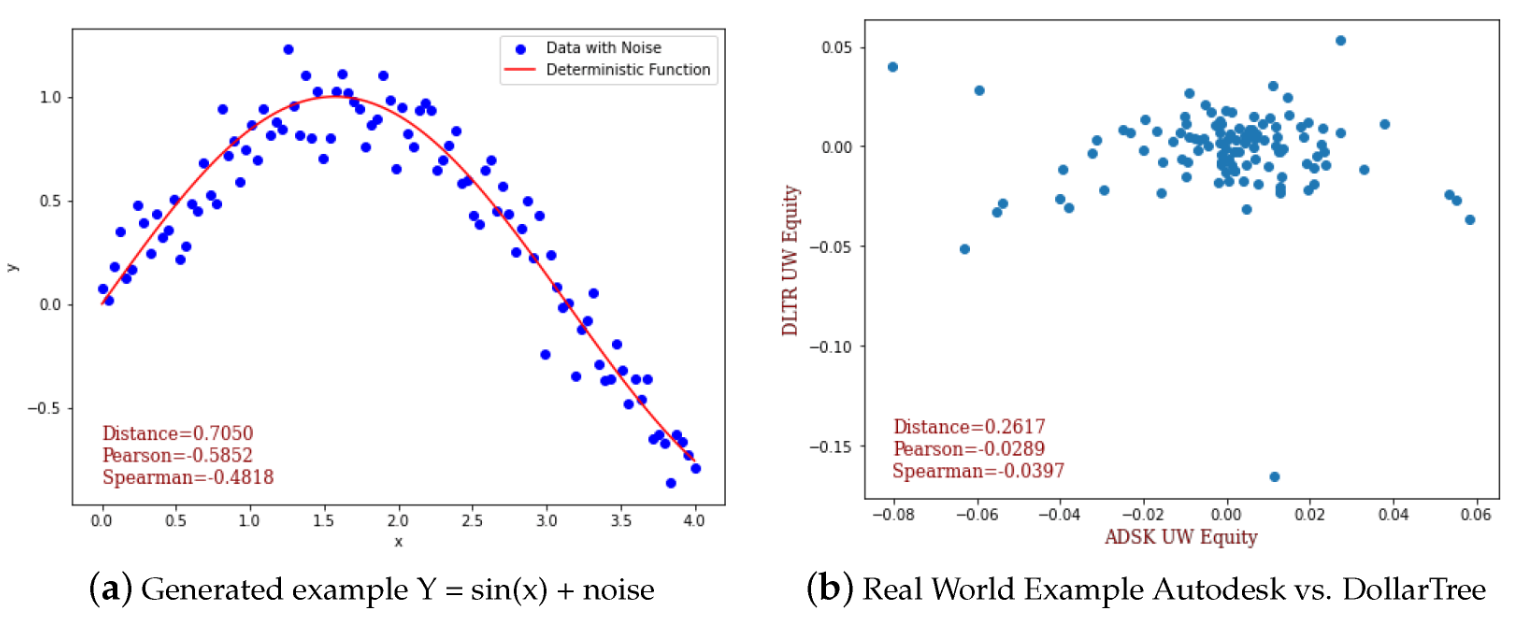

Note: you may need to restart the kernel to use updated packages.


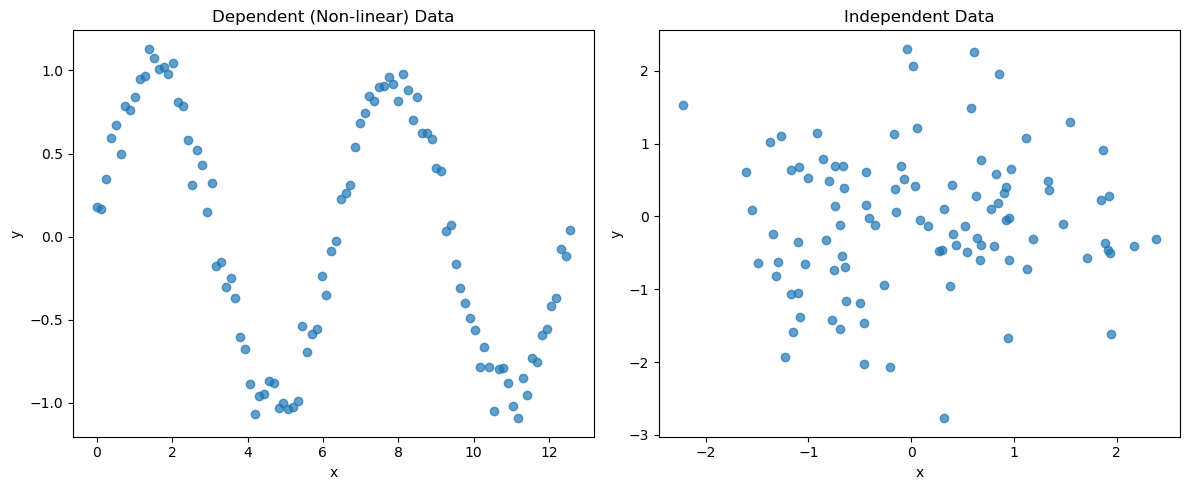

Non-linear dependent data test p-value: 0.0020
Independent data test p-value: 0.1936


In [ ]:
import numpy as np
%pip install dcor
import dcor
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Function Definition ---
def dcor(x, y, num_resamples=500):
    """
    Perform the distance correlation test between two variables x and y.

    Parameters:
        x (array-like): 1D or 2D data.
        y (array-like): 1D or 2D data.
        num_resamples (int): Number of permutations for the p-value estimation.

    Returns:
        p_value (float): Estimated p-value of the distance correlation test.
    """
    x = np.atleast_2d(x).T if x.ndim == 1 else x
    y = np.atleast_2d(y).T if y.ndim == 1 else y

    test_stat = dcor.distance_correlation(x, y)

    count = 0
    for _ in range(num_resamples):
        y_perm = np.random.permutation(y)
        stat_perm = dcor.distance_correlation(x, y_perm)
        if stat_perm >= test_stat:
            count += 1

    p_value = (count + 1) / (num_resamples + 1)
    return p_value

# --- Sample Data Generation ---
np.random.seed(0)

# Dependent (non-linear) data
x_dep = np.linspace(0, 4 * np.pi, 100)
y_dep = np.sin(x_dep) + 0.1 * np.random.normal(size=x_dep.shape)

# Independent data
x_indep = np.random.normal(0, 1, 100)
y_indep = np.random.normal(0, 1, 100)

# --- Plot the sample data ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x_dep, y_dep, alpha=0.7)
plt.title("Dependent (Non-linear) Data")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1, 2, 2)
plt.scatter(x_indep, y_indep, alpha=0.7)
plt.title("Independent Data")
plt.xlabel("x")
plt.ylabel("y")

plt.tight_layout()
plt.show()

# --- Run Distance Correlation Tests ---
p_val_dep = dcor(x_dep, y_dep)
print(f"Non-linear dependent data test p-value: {p_val_dep:.4f}")

p_val_indep = dcor(x_indep, y_indep)
print(f"Independent data test p-value: {p_val_indep:.4f}")


In [ ]:
# The Distance Correlation Test is a way to check whether two variables are related in any way—not just through a straight-line (linear) 
# relationship like traditional correlation tests. It’s especially useful because it can detect more complex, non-linear patterns, 
# like waves or curves. In the example above, the first set of data had a clear curved pattern (a sine wave), and the test gave a very small p-value, 
# meaning there is a significant relationship between the variables. The second set had completely random values, and the test gave a much larger p-value, 
# meaning there's no evidence that the two variables are connected. So, this test helps us understand whether two variables are linked—even if their 
# relationship isn’t obvious or simple.